Imagina que eres propietario de dos nuevas tiendas online, Store Sun y Store Moon, que acaban de comenzar sus negocios. Como propietario diligente, deseas realizar un seguimiento de las tasas de conversión de estas tiendas durante sus primeros diez días de funcionamiento.

Tu tarea es crear un gráfico de líneas que muestre las tasas de conversión de ambas tiendas durante los primeros diez días. El eje x debe representar los días, entre 1 y 10, y el eje y debe representar las tasas de conversión, entre 0% y 100%. Asegúrate de etiquetar el eje x como "Día" y el eje y como "Tasa de conversión". Además, asigna a tu gráfico el título "Tasa de conversión de tiendas en 10 días".

Recuerda establecer los valores de los ejes de manera adecuada para garantizar que todos los puntos de datos sean visibles en el gráfico.

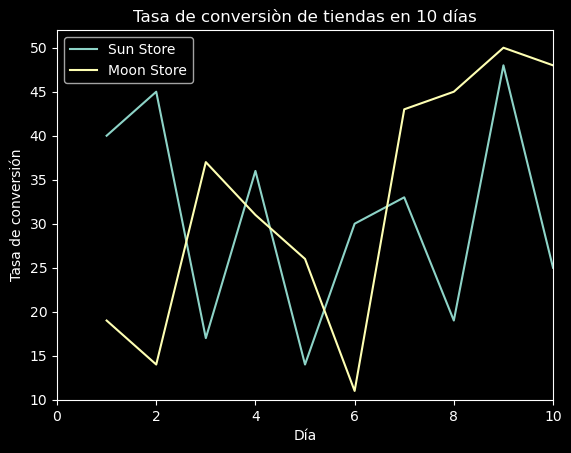

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

days = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
store_sun = [40, 45, 17, 36, 14, 30, 33, 19, 48, 25]
store_moon = [19, 14, 37, 31, 26, 11, 43, 45, 50, 48]

# Crear el gráfico de líneas
ax = sns.lineplot(x=days, y=store_sun, label='Sun Store')
sns.lineplot(x=days, y=store_moon, label='Moon Store')
# Establecer las etiquetas y el título del gráfico
plt.xlabel('Día')
plt.ylabel('Tasa de conversión')
plt.title('Tasa de conversiòn de tiendas en 10 días')

# Establecer los nuevos valores de los ejes x e y
ax.set_xlim(0,10)
ax.set_ylim(10,52)

# Mostrar el gráfico
plt.legend()
plt.show()

Te han asignado la tarea de visualizar el embudo de compra de Store Sun, que representa la cantidad de clientes en cada etapa del proceso de compra. Tu objetivo es crear un gráfico de barras con fondo negro que muestre la cantidad de clientes en cinco etapas diferentes: Main page (página principal), Product page (página de producto), Added to cart (agregado al carrito), Checkout page (página de pago) y Order (pedido). No olvides etiquetar el eje x como "Stage" (etapa), el eje y como "Quantity" (cantidad) y titular el gráfico "Purchase Funnel for Store Sun" (embudo de compra para Store Sun").

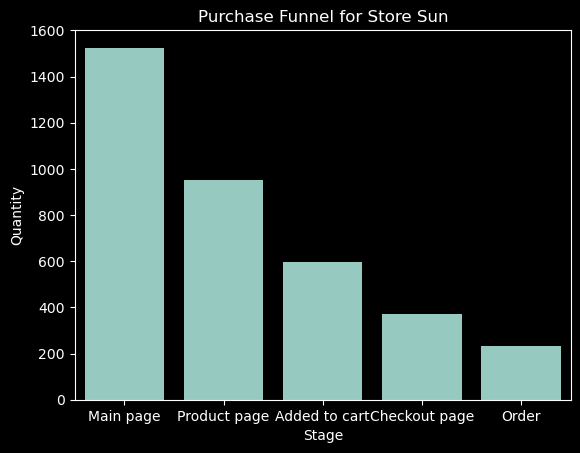

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir los datos para el gráfico de barras
data = {
    'Stage': ['Main page', 'Product page', 'Added to cart', 'Checkout page', 'Order'],
    'Quantity': [1525, 953, 595, 372, 232]
}
# Crear un DataFrame usando los datos
df = pd.DataFrame(data)

# Hacer que el fondo sea oscuro
plt.style.use("dark_background")

# Crear un gráfico de barras utilizando la librería seaborn
sns.barplot(x='Stage', y='Quantity', data=df)

# Agregar etiquetas y título al gráfico
plt.xlabel('Stage')
plt.ylabel('Quantity')
plt.title('Purchase Funnel for Store Sun')

# Mostrar el gráfico
plt.show()

1.Descarga los datos sobre los gastos del archivo /datasets/ad_data.csv y guárdalos en la variable ad_data. Obtén los datos sobre registros del archivo /datasets/site_data.csv y guárdalos en la variable site_data.

Fusiona los datos de la tabla en un DataFrame en la columna date. Guarda el resultado como funnel e imprime las primeras cinco filas del dataset resultante.

In [10]:
import pandas as pd

ad_data = pd.read_csv('/datasets/ad_data.csv')
site_data = pd.read_csv('/datasets/site_data.csv')
funnel = pd.merge(ad_data, site_data, on='date')
print(funnel.head(5))

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/ad_data.csv'

Resultado
         date  impressions  clicks  registrations
0  2019-08-01         6153      61              6
1  2019-08-02         8254      81              6
2  2019-08-03         4434      43              4
3  2019-08-04         9510      79              7
4  2019-08-05         7167      70              6

2. Crea los embudos para CTR (tasa de clics) y CR (tasa de conversión). Guarda los resultados en las columnas funnel['ctr, %'] y funnel['cr, %'] respectivamente. Imprime las primeras cinco filas del DataFrame.

In [ ]:
import pandas as pd

ad_data = pd.read_csv('/datasets/ad_data.csv' )
site_data = pd.read_csv('/datasets/site_data.csv')
funnel = pd.merge(ad_data, site_data, on='date')

funnel['ctr, %'] = funnel['clicks'] / funnel['impressions'] * 100
funnel['cr, %'] = funnel['registrations'] / funnel['clicks'] * 100
print(funnel.head(5))

Resultado
         date  impressions  clicks  registrations    ctr, %     cr, %
0  2019-08-01         6153      61              6  0.991386  9.836066
1  2019-08-02         8254      81              6  0.981342  7.407407
2  2019-08-03         4434      43              4  0.969779  9.302326
3  2019-08-04         9510      79              7  0.830705  8.860759
4  2019-08-05         7167      70              6  0.976699  8.571429

1.Encuentra los valores semanales de CTR y CR.

Descarga los datos sobre las tasas de conversión diarias del archivo /datasets/funnel_daily.csv y guárdalos en la variable funnel_daily. Convierte los valores de la columna funnel_daily['date'] al formato datetime. Agrega la columna funnel_daily['week'] y busca allí el número de la semana para cada fecha.

Calcula el CTR y el CR semanales. Guarda el resultado como funnel_weekly.

In [ ]:
import pandas as pd

funnel_daily = pd.read_csv('/datasets/funnel_daily.csv')

funnel_daily['date'] = pd.to_datetime(funnel_daily['date'])
funnel_daily['week'] = funnel_daily['date'].dt.week

funnel_weekly = funnel_daily.groupby('week')[
    ['impressions', 'clicks', 'registrations']
].sum()
funnel_weekly['ctr, %'] = (
    funnel_weekly['clicks'] / funnel_weekly['impressions'] * 100
)
funnel_weekly['cr, %'] = (
    funnel_weekly['registrations'] / funnel_weekly['clicks'] * 100
)
print(funnel_weekly)

Resultado
      impressions  clicks  registrations    ctr, %     cr, %
week
31          28351     264             23  0.931184  8.712121
32          57031     503             43  0.881976  8.548708
33          57184     471             39  0.823657  8.280255
34          49911     424             37  0.849512  8.726415
35          34956     307             25  0.878247  8.143322

2.Este ejercicio se parece mucho al anterior. Traza embudos diarios, semanales y mensuales.

Lee los datos sobre los gastos de publicidad (/datasets/ad_data_2.csv) y guárdalos en la variable ad_data. Guarda los datos sobre los registros (/datasets/site_data_2.csv) como site_data.

Utiliza el método merge()  para unir ad_data y site_data en la columna 'date'. Guarda el DataFrame resultante con embudos diarios como funnel_daily.  Calcula la conversión de impressions a clicks, guardándola en la columna ctr, %, y de clicks a registrations, guardándola en la columna cr, %. En funnel_daily crea las columnas 'week' y 'month'. Recupera los números de orden de las semanas y meses con los métodos dt.week y dt.month, respectivamente. Almacena los resultados en las columnas mencionadas anteriormente.

Guarda el embudo semanal en funnel_weekly. Agrupa los datos funnel_daily por la columna 'week' utilizando el método groupby(). Suma los datos de las columnas ['impressions', 'clicks', 'registrations'] dentro de la agrupación.

Haz un embudo mensual usando el mismo enfoque. Guárdalo como funnel_monthly.

Calcula el CTR y el CR para cada uno de los tres embudos. Imprime el embudo mensual.

In [ ]:
import pandas as pd

ad_data = pd.read_csv('/datasets/ad_data_2.csv')
site_data = pd.read_csv('/datasets/site_data_2.csv')

funnel_daily = pd.merge(ad_data, site_data, on='date')
funnel_daily['ctr, %'] = (
    funnel_daily['clicks'] / funnel_daily['impressions'] * 100
)
funnel_daily['cr, %'] = (
    funnel_daily['registrations'] / funnel_daily['clicks'] * 100
)

funnel_daily['date'] = pd.to_datetime(funnel_daily['date'])
funnel_daily['week'] = funnel_daily['date'].dt.week
funnel_daily['month'] = funnel_daily['date'].dt.month

funnel_weekly = funnel_daily.groupby('week')[
    ['impressions', 'clicks', 'registrations']
].sum()
funnel_weekly['ctr, %'] = (
    funnel_weekly['clicks'] / funnel_weekly['impressions'] * 100
)
funnel_weekly['cr, %'] = (
    funnel_weekly['registrations'] / funnel_weekly['clicks'] * 100
)

funnel_monthly = funnel_daily.groupby('month')[
    ['impressions', 'clicks', 'registrations']
].sum()
funnel_monthly['ctr, %'] = (
    funnel_monthly['clicks'] / funnel_monthly['impressions'] * 100
)
funnel_monthly['cr, %'] = (
    funnel_monthly['registrations'] / funnel_monthly['clicks'] * 100
)

print(funnel_monthly)

impressions  clicks  registrations    ctr, %     cr, %
month
1           197929    1462            118  0.738649  8.071135
2           188815    1447            103  0.766359  7.118176
3           214317    1710            122  0.797884  7.134503